# Project 1: Analysis and Forecasting of NYC Taxi Rides

In [36]:
# The code makes sure that once there is change in the 'src/' folder, the 
# change will be automatically reloaded in the notebook.
%reload_ext autoreload
%autoreload 2
%aimport src

### Task 1: Understanding the Data

Yellow and green taxi trip records include fields capturing 
- pick-up and drop-off dates/times
- pick-up and drop-off locations
- trip distances
- itemized fares
- rate types
- payment types
- driver-reported passenger counts 
  
The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). The trip data was not created by the TLC, and TLC makes no representations as to the accuracy of these data.

**Remark**: Feel free to change the *months* and *year* in the code below, if you need more/less data. 

In [37]:
import pandas as pd
from src.utils import load_data_from_google_drive

# Define the base URLs for the yellow and green taxi data
base_url_yellow = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month}.parquet"
base_url_green = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_{year}-{month}.parquet"
zones_url = 'https://drive.google.com/file/d/12VgjWXkyEBsxzuKFxIkAevEbao85ei0T/view?usp=sharing'

# Define the months and year you're interested in
months = ['01', '02']
year = '2022'

# Create empty lists to store the dataframes
df_yellow_list = []
df_green_list = []

# Loop over the months
for month in months:
    # Create the full URL for the yellow and green taxi data
    dfy = pd.read_parquet(base_url_yellow.format(year=year, month=month))
    dfg = pd.read_parquet(base_url_green.format(year=year, month=month))
    
    # Download the data and append it to the list
    df_yellow_list.append(dfy)
    df_green_list.append(dfg)

# Concatenate the list of dataframes into a single dataframe
df_yellow = pd.concat(df_yellow_list)
df_green = pd.concat(df_green_list)

df_zones = load_data_from_google_drive(url=zones_url)

In [38]:
df_yellow.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [39]:
df_green.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,0.50,0.5,0.00,0.0,None,0.3,4.80,2.0,1.0,0.00
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,0.50,0.5,0.00,0.0,None,0.3,10.80,2.0,1.0,0.00
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,3.25,0.5,4.60,0.0,None,0.3,23.15,1.0,1.0,2.75
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,0.50,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,0.50,0.5,5.21,0.0,None,0.3,31.26,1.0,1.0,2.75


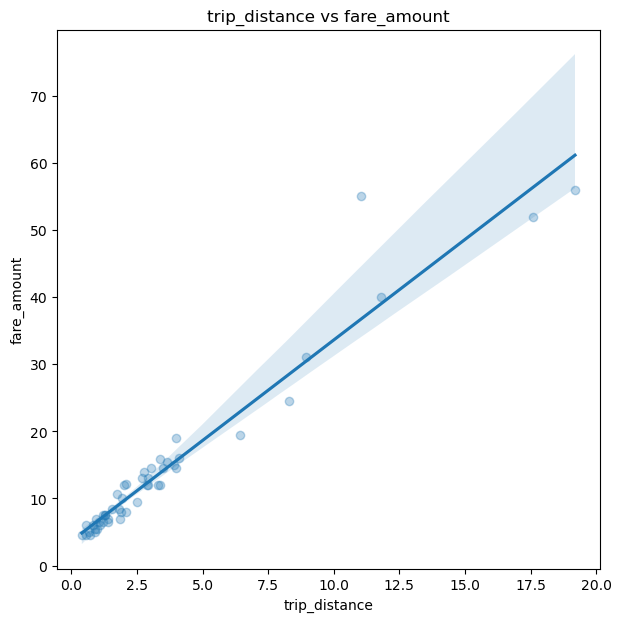

In [40]:
from src.utils import create_scatterplot1

create_scatterplot1(
    df_yellow.sample(50), 
    x_col = 'trip_distance', 
    y_col = 'fare_amount', 
    title = 'trip_distance vs fare_amount', 
    xlabel = 'trip_distance',
    ylabel = 'fare_amount',
   
)

In [41]:
print('DOYIN SKAL LAVE TITLER I KOMMENTAR FORM TIL AT ALLE GRAFERNE øverst inden koden starter ')
print('Så MAN DIREKTE KAN SE HVAD DET ER FOR NOGET KODE MAN SKAL TIL AT LÆSE')
#man laver kommentarer sådan her

DOYIN SKAL LAVE TITLER I KOMMENTAR FORM TIL AT ALLE GRAFERNE øverst inden koden starter 
Så MAN DIREKTE KAN SE HVAD DET ER FOR NOGET KODE MAN SKAL TIL AT LÆSE


### Task 2: Exploratory Data Analysis
Conduct exploratory data analysis to understand the patterns and relationships in the data. This includes analyzing the distribution of trip distances, fares, and passenger counts, as well as the relationship between these variables.

In [42]:
df_yellow = df_yellow[df_yellow.fare_amount >=1]
df_green = df_green[df_green.fare_amount >=1]


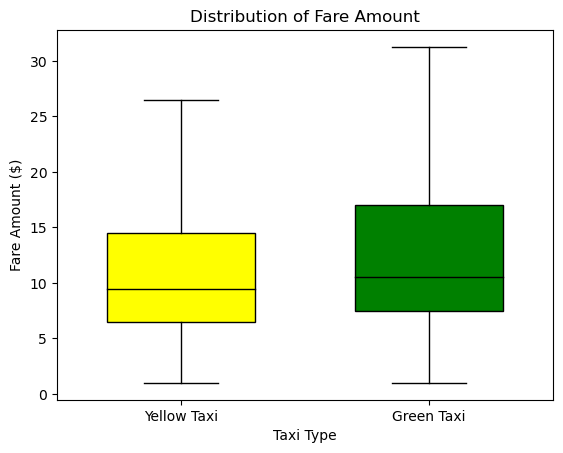

In [43]:
# Write your code

import matplotlib.pyplot as plt

# Plotting boxplot for yellow taxis
plt.boxplot(df_yellow['fare_amount'], positions=[1], sym='', widths=0.6, patch_artist=True, boxprops=dict(facecolor='yellow', color='black'), medianprops=dict(color='black'))

# Plotting boxplot for green taxis
plt.boxplot(df_green['fare_amount'], positions=[2], sym='', widths=0.6, patch_artist=True, boxprops=dict(facecolor='green', color='black'), medianprops=dict(color='black'))

plt.xlabel('Taxi Type')
plt.ylabel('Fare Amount ($)')
plt.title('Distribution of Fare Amount')
plt.xticks([1, 2], ['Yellow Taxi', 'Green Taxi'])
plt.show()

In [44]:
print('TILGØJE LABELS GRØN TAXI OG GUL TAXI I ALLE PLOTS HVOR DE ER I FÆLLES FIGUR.')
print(' TIL BOKSPLOT OG SCATTERPLOTS LIGESOM DU HAR GJORT TIL LINEPLOTS')

TILGØJE LABELS GRØN TAXI OG GUL TAXI I ALLE PLOTS HVOR DE ER I FÆLLES FIGUR.
 TIL BOKSPLOT OG SCATTERPLOTS LIGESOM DU HAR GJORT TIL LINEPLOTS


In [45]:
print('Mean, maximum, and minimum for Fare Amount for df_yellow')
print()
yellow_fare_stats = df_yellow['fare_amount'].agg(['mean', 'max', 'min'])
yellow_fare_stats = yellow_fare_stats.round(2)  # Round to two decimal places
print(yellow_fare_stats)

print()

# Mean, maximum, and minimum for Fare Amount in df_green
print('Mean, maximum, and minimum for Fare Amount for df_green')
print()
green_fare_stats = df_green['fare_amount'].agg(['mean', 'max', 'min'])
green_fare_stats = green_fare_stats.round(2)  # Round to two decimal places
print(green_fare_stats)

Mean, maximum, and minimum for Fare Amount for df_yellow

mean        13.19
max     401092.32
min          1.00
Name: fare_amount, dtype: float64

Mean, maximum, and minimum for Fare Amount for df_green

mean     14.09
max     604.50
min       1.00
Name: fare_amount, dtype: float64


In [46]:
print('EN SÅ VOLDSOM FARE AMOUNT GIVER INGEN MENING')

EN SÅ VOLDSOM FARE AMOUNT GIVER INGEN MENING


In [47]:

df_yellow = df_yellow[df_yellow.trip_distance >= 1]
df_green = df_green[df_green.trip_distance >= 1]

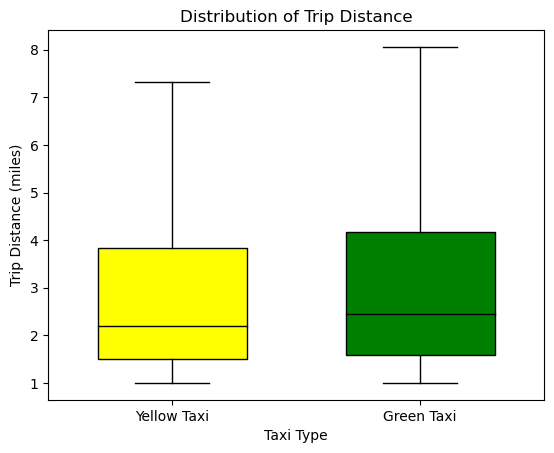

In [48]:

import matplotlib.pyplot as plt

# Plotting boxplot for yellow taxis
plt.boxplot(df_yellow['trip_distance'], positions=[1], sym='', widths=0.6, patch_artist=True, boxprops=dict(facecolor='yellow', color='black'), medianprops=dict(color='black'))

# Plotting boxplot for green taxis
plt.boxplot(df_green['trip_distance'], positions=[2], sym='', widths=0.6, patch_artist=True, boxprops=dict(facecolor='green', color='black'), medianprops=dict(color='black'))

plt.xlabel('Taxi Type')
plt.ylabel('Trip Distance (miles)')
plt.title('Distribution of Trip Distance')
plt.xticks([1, 2], ['Yellow Taxi', 'Green Taxi'])
plt.show()

In [49]:
print('Mean, maximum, and minimum for Trip Distance for df_yellow')
print()
yellow_distance_stats = df_yellow['trip_distance'].agg(['mean', 'max', 'min'])
yellow_distance_stats = yellow_distance_stats.round(2)  # Round to two decimal places
print(yellow_distance_stats)

print()


print('Mean, maximum, and minimum for Trip Distance for df_green')
print()
green_distance_stats = df_green['trip_distance'].agg(['mean', 'max', 'min'])
green_distance_stats = green_distance_stats.round(2)  # Round to two decimal places
print(green_distance_stats)

Mean, maximum, and minimum for Trip Distance for df_yellow

mean         7.04
max     348798.53
min          1.00
Name: trip_distance, dtype: float64

Mean, maximum, and minimum for Trip Distance for df_green

mean       111.63
max     259777.57
min          1.00
Name: trip_distance, dtype: float64


In [50]:
print('LAVE EN FORM FOR VALUE COUNT SOM GIVER OS TALLENE PÅ HVORMANGE PASSENGER COUNTS DER ER LAVET PÅ PASSENGER NUMBERS')
print('x-aksen burde hedde number of passengers og så er y-aksen passenger count?????')
print()


from src.utils import print_passenger_count_distribution
print_passenger_count_distribution(df_yellow, "Passenger count distribution in df_yellow:")
print()
print_passenger_count_distribution(df_green, "Passenger count distribution in df_green:")

LAVE EN FORM FOR VALUE COUNT SOM GIVER OS TALLENE PÅ HVORMANGE PASSENGER COUNTS DER ER LAVET PÅ PASSENGER NUMBERS
x-aksen burde hedde number of passengers og så er y-aksen passenger count?????

Passenger count distribution in df_yellow:
1: 3,044,874
2: 601,325
3: 148,333
4: 60,343
5: 86,763
6: 57,253
7: 1
8: 2
9: 2

Passenger count distribution in df_green:
1: 78,414
2: 7,064
3: 1,226
4: 374
5: 1,895
6: 1,357
7: 1
8: 6
9: 0


In [51]:
passenger_counts_yellow = df_yellow['passenger_count'].value_counts()
passenger_counts_green = df_green['passenger_count'].value_counts()
df_yellow_sample1 = df_yellow[(df_yellow['passenger_count'] > 0) & df_yellow['passenger_count'].isin(passenger_counts_yellow[passenger_counts_yellow > 10].index)]
df_green_sample1 = df_green[(df_green['passenger_count'] > 0) & df_green['passenger_count'].isin(passenger_counts_green[passenger_counts_green > 10].index)]

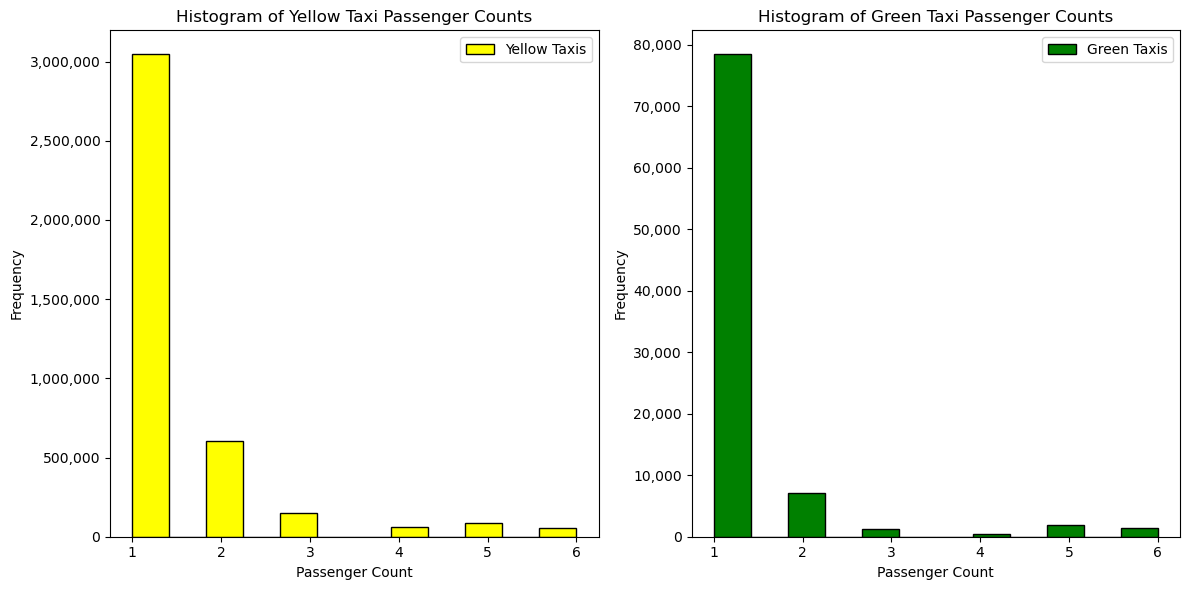

In [52]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting yellow taxi passenger counts
axes[0].hist(df_yellow_sample1.passenger_count, bins=12, color='yellow', label='Yellow Taxis', edgecolor='black')
axes[0].set_xlabel('Passenger Count')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Yellow Taxi Passenger Counts')
axes[0].legend()

# Format the y-axis labels with commas and decimal points
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Plotting green taxi passenger counts
axes[1].hist(df_green_sample1.passenger_count, bins=12, color='green', label='Green Taxis', edgecolor='black')
axes[1].set_xlabel('Passenger Count')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Green Taxi Passenger Counts')
axes[1].legend()

# Format the y-axis labels with commas and decimal points
axes[1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [53]:
# Converting colons to datetime-format for green taxis
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])
df_green['lpep_dropoff_datetime'] = pd.to_datetime(df_green['lpep_dropoff_datetime'])

# Calculating trip duration by subtracting pickup-time and dropoff-time
# Beregn trip duration ved at trække pickup-tidspunktet fra dropoff-tidspunktet
df_green['trip_duration'] = (df_green['lpep_dropoff_datetime'] - df_green['lpep_pickup_datetime']).dt.total_seconds()

# Converting colons to datetime-format for yellow taxis
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])
df_yellow['tpep_dropoff_datetime'] = pd.to_datetime(df_yellow['tpep_dropoff_datetime'])

# Beregn trip duration ved at trække pickup-tidspunktet fra dropoff-tidspunktet
df_yellow['trip_duration'] = (df_yellow['tpep_dropoff_datetime'] - df_yellow['tpep_pickup_datetime']).dt.total_seconds()

In [54]:
df_yellow_sample3 = df_yellow.sample(50)
df_yellow_sample3 = df_yellow_sample3[(df_yellow_sample3['trip_duration'] < 900)]
df_yellow_sample3=df_yellow_sample3[df_yellow_sample3.trip_distance < 10]



In [55]:

df_green_sample3 = df_green.sample(50)
df_green_sample3 = df_green_sample3[(df_green_sample3['trip_duration'] < 900)]
df_green_sample3=df_green_sample3[df_green_sample3.trip_distance < 10]

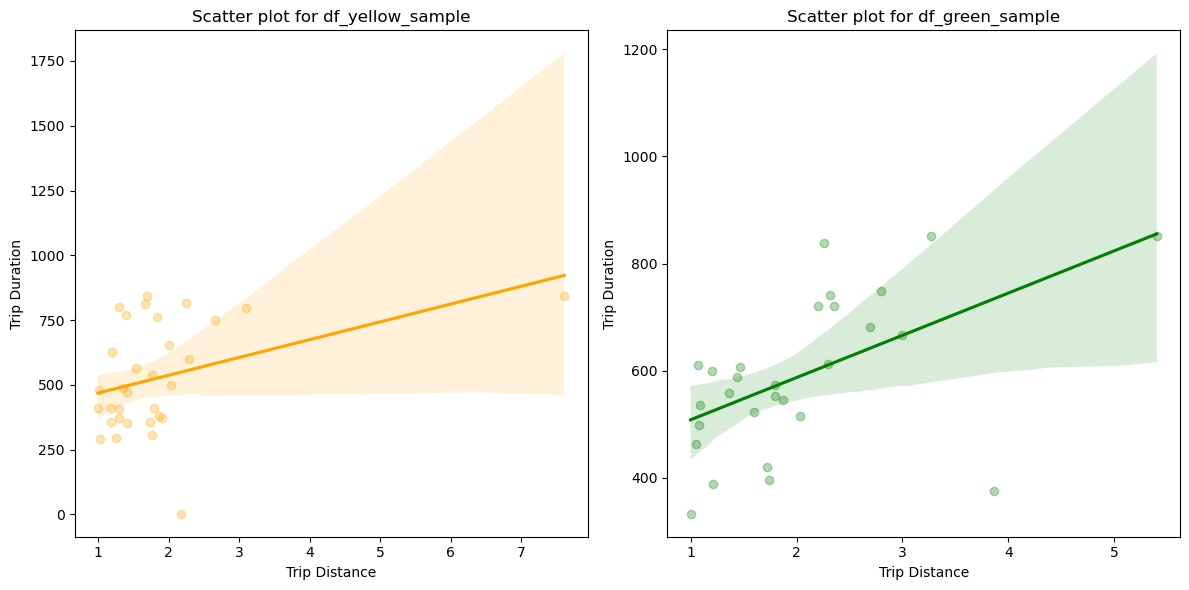

In [56]:
from src.utils import create_scatterplot
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for df_yellow_sample
create_scatterplot(axes[0], df_yellow_sample3, x_col='trip_distance', y_col='trip_duration', title='Scatter plot for df_yellow_sample', xlabel='Trip Distance', ylabel='Trip Duration', color='orange')

# Scatter plot for df_green_sample
create_scatterplot(axes[1], df_green_sample3, x_col='trip_distance', y_col='trip_duration', title='Scatter plot for df_green_sample', xlabel='Trip Distance', ylabel='Trip Duration', color='green')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [57]:
import numpy as np
# Calculate the correlation coefficient for df_green_sample
green_correlation_DistanceAndDuration = np.corrcoef(df_green_sample3['trip_distance'], df_green_sample3['trip_duration'])[0, 1]

# Calculate the correlation coefficient for df_yellow_sample
yellow_correlation_DistanceAndDuration = np.corrcoef(df_yellow_sample3['trip_distance'], df_yellow_sample3['trip_duration'])[0, 1]

print("Correlation coefficient for df_green_sample: {:.2f}".format(green_correlation_DistanceAndDuration))
print("Correlation coefficient for df_yellow_sample: {:.2f}".format(yellow_correlation_DistanceAndDuration))



print('CORRELATION ÆNDRER SIG FOR HVERGANG VI RUNNER SAMPLE, IDET DET BARE ER EN TILFÆLDIG SAMPLE VI BEREGNER CORRELATION PÅ???') 
print ('MON VI BURDE KØRER PÅ DET ALMINDELIG ISTEDEt FOR SAMPLE')

Correlation coefficient for df_green_sample: 0.54
Correlation coefficient for df_yellow_sample: 0.38
CORRELATION ÆNDRER SIG FOR HVERGANG VI RUNNER SAMPLE, IDET DET BARE ER EN TILFÆLDIG SAMPLE VI BEREGNER CORRELATION PÅ???
MON VI BURDE KØRER PÅ DET ALMINDELIG ISTEDEt FOR SAMPLE


In [97]:

df_yellow_prøve=df_yellow.sample(100)
df_green_prøve=df_green.sample(100)

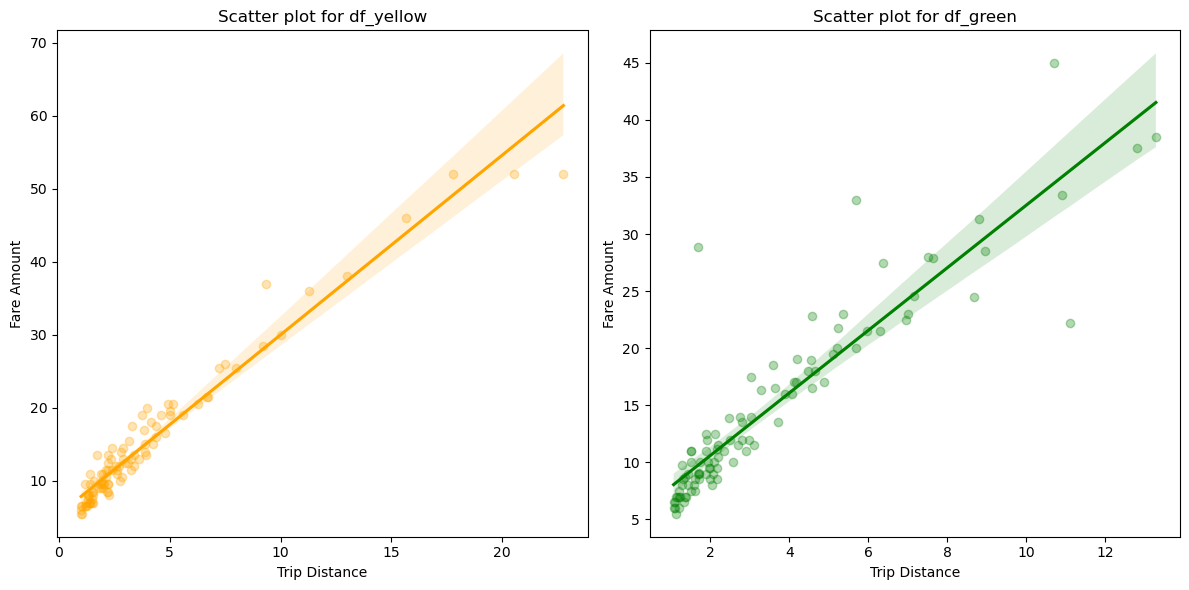

In [98]:
from src.utils import create_scatterplot
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for df_yellow_sample
create_scatterplot(axes[0], df_yellow_prøve, x_col='trip_distance', y_col='fare_amount', title='Scatter plot for df_yellow', xlabel='Trip Distance', ylabel='Fare Amount', color='orange')

# Scatter plot for df_green_sample
create_scatterplot(axes[1], df_green_prøve, x_col='trip_distance', y_col='fare_amount', title='Scatter plot for df_green', xlabel='Trip Distance', ylabel='Fare Amount', color='green')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [105]:
import numpy as np
# Calculate the correlation coefficient for df_green
green_correlation_DistanceAndFare = np.corrcoef(df_green_prøve['trip_distance'], df_green_prøve['fare_amount'])[0, 1]

# Calculate the correlation coefficient for df_yellow
yellow_correlation_DistanceAndFare = np.corrcoef(df_yellow_prøve['trip_distance'], df_yellow_prøve['fare_amount'])[0, 1]

print("Correlation coefficient for df_green: {:.2f}".format(green_correlation_DistanceAndFare))
print("Correlation coefficient for df_yellow: {:.2f}".format(yellow_correlation_DistanceAndFare))

print()


print('GIV SCATTERPLOTS FORNUFTIGE TITLER')

Correlation coefficient for df_green: 0.91
Correlation coefficient for df_yellow: 0.98

GIV SCATTERPLOTS FORNUFTIGE TITLER


HVAD SKAL MAN PLOTTE; HVILKEN TYPE FIGUR NÅR MAN HAR PARAMETRE DER HAR INTET MED HINANDEN AT GØRE???
DET HJÆLPER IKKE AT FJERNE OUTLIERS HER; NÅR DE INTET HAR MED HINANDEN AT GØRE???


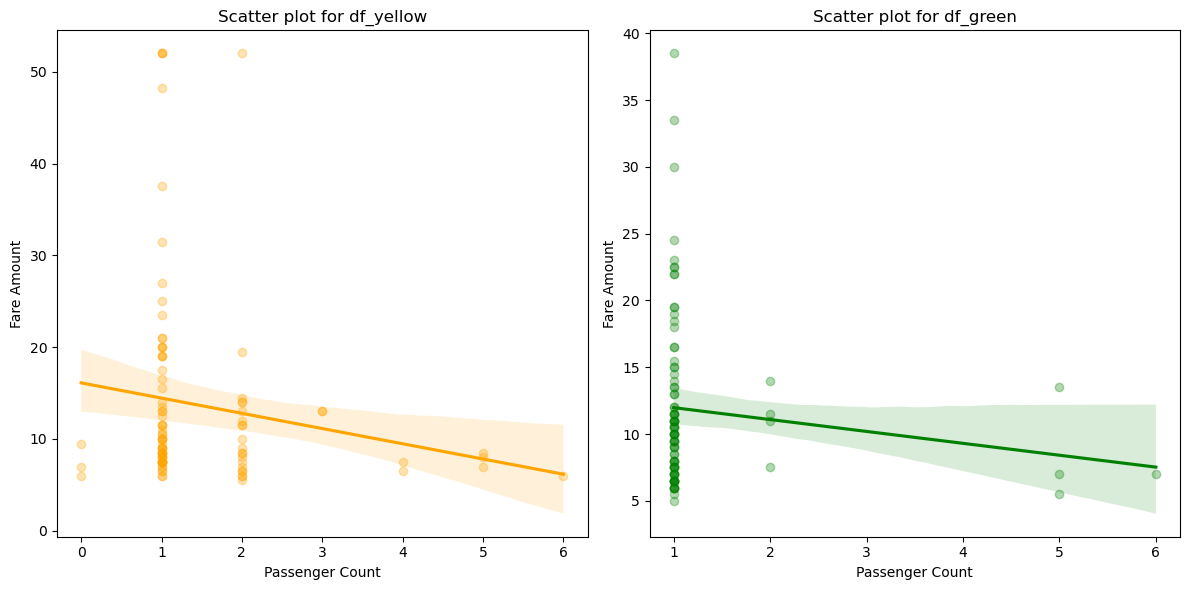

In [106]:
print('HVAD SKAL MAN PLOTTE; HVILKEN TYPE FIGUR NÅR MAN HAR PARAMETRE DER HAR INTET MED HINANDEN AT GØRE???')
print('DET HJÆLPER IKKE AT FJERNE OUTLIERS HER; NÅR DE INTET HAR MED HINANDEN AT GØRE???')

from src.utils import create_scatterplot

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for df_yellow_sample
create_scatterplot(axes[0], df_yellow.sample(100), x_col='passenger_count', y_col='fare_amount', title='Scatter plot for df_yellow', xlabel='Passenger Count', ylabel='Fare Amount', color='orange')

# Scatter plot for df_green_sample
create_scatterplot(axes[1], df_green.sample(100), x_col='passenger_count', y_col='fare_amount', title='Scatter plot for df_green', xlabel='Passenger Count', ylabel='Fare Amount', color='green')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [107]:
import numpy as np

# Calculate the correlation coefficient for fare_amount and passenger_count in df_yellow.sample(100)
yellow_correlation_FareAndPassenger = np.corrcoef(df_yellow.sample(100)['fare_amount'], df_yellow.sample(100)['passenger_count'])[0, 1]

# Calculate the correlation coefficient for fare_amount and passenger_count in df_green.sample(100)
green_correlation_FareAndPassenger = np.corrcoef(df_green.sample(100)['fare_amount'], df_green.sample(100)['passenger_count'])[0, 1]



print("Correlation coefficient for Fare Amount and Passenger Count for df_yellow: {:.2f}".format(yellow_correlation_FareAndPassenger))

print("Correlation coefficient for Fare Amount and Passenger Count for df_green: {:.2f}".format(green_correlation_FareAndPassenger))
print()
print('GIVER JO GOD MENING NÅR DE INTET HAR MED HINANDEN aT gøre,men hvordan plotter vi det godt??? men hvorfor står der nan???')

Correlation coefficient for Fare Amount and Passenger Count for df_yellow: nan
Correlation coefficient for Fare Amount and Passenger Count for df_green: nan

GIVER JO GOD MENING NÅR DE INTET HAR MED HINANDEN aT gøre,men hvordan plotter vi det godt??? men hvorfor står der nan???


HVAD SKAL MAN PLOTTE; HVILKEN TYPE FIGUR NÅR MAN HAR PARAMETRE DER HAR INTET MED HINANDEN AT GØRE???
DET HJÆLPER IKKE AT FJERNE OUTLIERS HER; NÅR DE INTET HAR MED HINANDEN AT GØRE???


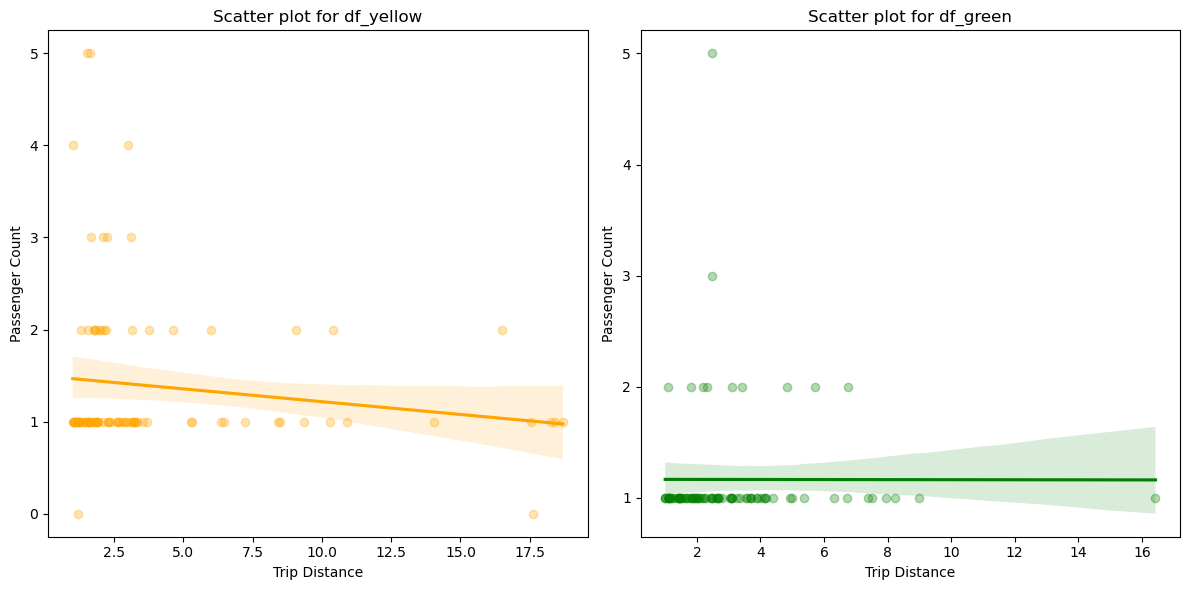

In [108]:
print('HVAD SKAL MAN PLOTTE; HVILKEN TYPE FIGUR NÅR MAN HAR PARAMETRE DER HAR INTET MED HINANDEN AT GØRE???')
print('DET HJÆLPER IKKE AT FJERNE OUTLIERS HER; NÅR DE INTET HAR MED HINANDEN AT GØRE???')

from src.utils import create_scatterplot

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for df_yellow_sample
create_scatterplot(axes[0], df_yellow.sample(100), x_col='trip_distance', y_col='passenger_count', title='Scatter plot for df_yellow', xlabel='Trip Distance', ylabel='Passenger Count', color='orange')

# Scatter plot for df_green_sample
create_scatterplot(axes[1], df_green.sample(100), x_col='trip_distance', y_col='passenger_count', title='Scatter plot for df_green', xlabel='Trip Distance', ylabel='Passenger Count', color='green')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [109]:
# Calculate the correlation coefficient for passenger_count and trip_distance in df_yellow.sample(100)
yellow_correlation_DistanceAndPassenger = np.corrcoef(df_yellow.sample(100)['passenger_count'], df_yellow.sample(100)['trip_distance'])[0, 1]
# Calculate the correlation coefficient for passenger_count and trip_distance in df_green.sample(100)
green_correlation_DistanceAndPassenger = np.corrcoef(df_green.sample(100)['passenger_count'], df_green.sample(100)['trip_distance'])[0, 1]

print("Correlation coefficient for Passenger Count and Trip Distance for df_yellow: {:.2f}".format(yellow_correlation_DistanceAndPassenger))
print("Correlation coefficient for Passenger Count and Trip Distance for df_green: {:.2f}".format(green_correlation_DistanceAndPassenger))

print()
print('GIVER GOD MENING, de har intet med hinanden at gøre, kunne være godt at have en god graf der bakker dette op')
print(', fordi scatterplot er måske ikke det rigtige at lave')

Correlation coefficient for Passenger Count and Trip Distance for df_yellow: nan
Correlation coefficient for Passenger Count and Trip Distance for df_green: nan

GIVER GOD MENING, de har intet med hinanden at gøre, kunne være godt at have en god graf der bakker dette op
, fordi scatterplot er måske ikke det rigtige at lave


In [64]:
df_yellow_samples = df_yellow[(df_yellow['payment_type'] != 0) & df_yellow['payment_type'].notnull()]
df_green_samples = df_green[(df_green['payment_type'] != 0) & df_green['payment_type'].notnull()]

In [65]:
#måske value.counts i ovenstående data cleaning for at fjerne payment 5 som næsten intet har

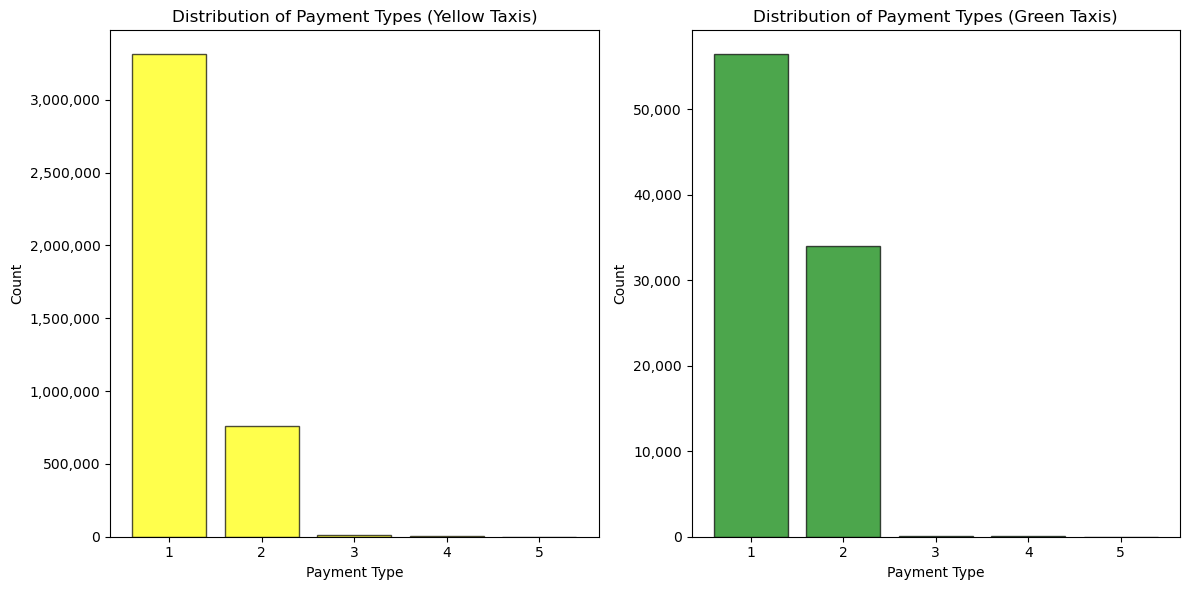

In [66]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Load data from df_green and df_yellow, and the relevant columns (payment_type)
payment_counts_green = df_green_samples['payment_type'].value_counts()
payment_counts_yellow = df_yellow_samples['payment_type'].value_counts()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting yellow taxi payment types
axes[0].bar(payment_counts_yellow.index, payment_counts_yellow.values, color='yellow', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Payment Type')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Payment Types (Yellow Taxis)')

# Format the y-axis labels with commas
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Plotting green taxi payment types
axes[1].bar(payment_counts_green.index, payment_counts_green.values, color='green', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Payment Type')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Payment Types (Green Taxis)')

# Format the y-axis labels with commas
axes[1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [67]:
from src.utils import print_payment_type_distribution

# Print payment type distribution for df_yellow_samples
print_payment_type_distribution(df_yellow, "Payment type distribution in df_yellow_samples")

# Print payment type distribution for df_yellow
print_payment_type_distribution(df_green, "Payment type distribution in df_yellow")

Payment type distribution in df_yellow_samples
1: 3,311,408
2: 759,617
0: 153,559
3: 10,313
4: 4,088
5: 1
Payment type distribution in df_yellow
1.0: 56,427
2.0: 34,008
3.0: 126
4.0: 85
5.0: 2


### Task 3: Spatial Analysis
Use Kepler.gl (https://kepler.gl/) or similar tools/packages to visualize the spatial patterns of taxi rides. This includes the pickup and dropoff locations, as well as the routes taken. Analyze the spatial patterns to identify hotspots of taxi demand.

You can find a good tutorial on https://docs.kepler.gl/docs/keplergl-jupyter#install for how to use it in jupyter notebook with python.

**Hint** In order to visualize the pickup/dropoff location geographically, you might need to know the latitude (lat) and longitude (lng) for each location. You can find the corresponding information in the dataframe "df_zones".

In [68]:
df_zones.head(5)

,Shape_Leng,Shape_Area,zone,LocationID,borough,lat,lng
0,0.116357,0.000782,Newark Airport,1,EWR,40.689516,-74.176786
1,0.433470,0.004866,Jamaica Bay,2,Queens,40.625724,-73.826126
2,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,40.865888,-73.849479
3,0.043567,0.000112,Alphabet City,4,Manhattan,40.724152,-73.977023
4,0.092146,0.000498,Arden Heights,5,Staten Island,40.550340,-74.189930


In [69]:
#df_yellow_sample_3 = df_yellow[(df_yellow.tpep_pickup_datetime > '2022-02-01 10:00:00') & (df_yellow.tpep_pickup_datetime < '2022-02-28 12:00:00')]

#df_green_sample_4 = df_green[(df_green.lpep_pickup_datetime > '2022-02-01 10:00:00') & (df_green.lpep_pickup_datetime < '2022-02-28 12:00:00')]

In [70]:
#df_yellow_sample_3.shape

In [71]:
#df_green_sample_4.shape

In [72]:
#pd.merge(df_yellow_sample_3, df_zones, how='left', left_on='PULocationID', right_on='LocationID').to_csv('yellow_taxi.csv', index=False)

#pd.merge(df_green_sample_4, df_zones, how='left', left_on='PULocationID', right_on='LocationID').to_csv('green_taxi.csv', index=False)

print('KAN VI KALDE CSV FILERNE NOGET ANDET FOR AT UNDGÅ AT DET OVERWRTIER MED DE ANDRE OPGAVE 4')

KAN VI KALDE CSV FILERNE NOGET ANDET FOR AT UNDGÅ AT DET OVERWRTIER MED DE ANDRE OPGAVE 4


### Task 4: Temporal Analysis
Analyze the temporal patterns of taxi rides. This includes the number of rides by time of day, day of the week, and month of the year. Also, analyze the relationship between temporal patterns and other variables, such as trip distance and fare.

You can find very good code examples to use on this page https://www.machinelearningplus.com/time-series/time-series-analysis-python/?utm_content=cmp-true

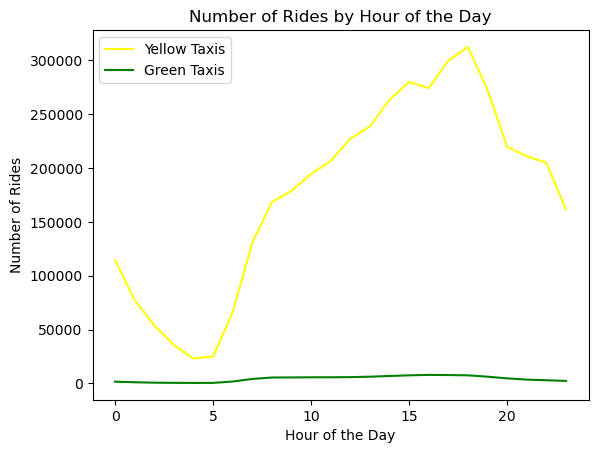

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

#Load data from your DataFrames (e.g., df_yellow and df_green) and the relevant columns (pick up time, trip distance, fare)
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])

#Analyze the number of rides by hour of the day for yellow taxis
df_yellow['hour_of_day'] = df_yellow['tpep_pickup_datetime'].dt.hour
rides_by_hour_yellow = df_yellow['hour_of_day'].value_counts().sort_index()

#Analyze the number of rides by hour of the day for green taxis
df_green['hour_of_day'] = df_green['lpep_pickup_datetime'].dt.hour
rides_by_hour_green = df_green['hour_of_day'].value_counts().sort_index()

#Create a line plot to show the number of rides by hour of the day for both yellow and green taxis
plt.plot(rides_by_hour_yellow.index, rides_by_hour_yellow.values, color='yellow', label='Yellow Taxis')
plt.plot(rides_by_hour_green.index, rides_by_hour_green.values, color='green', label='Green Taxis')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.title('Number of Rides by Hour of the Day')
plt.legend()

plt.show()

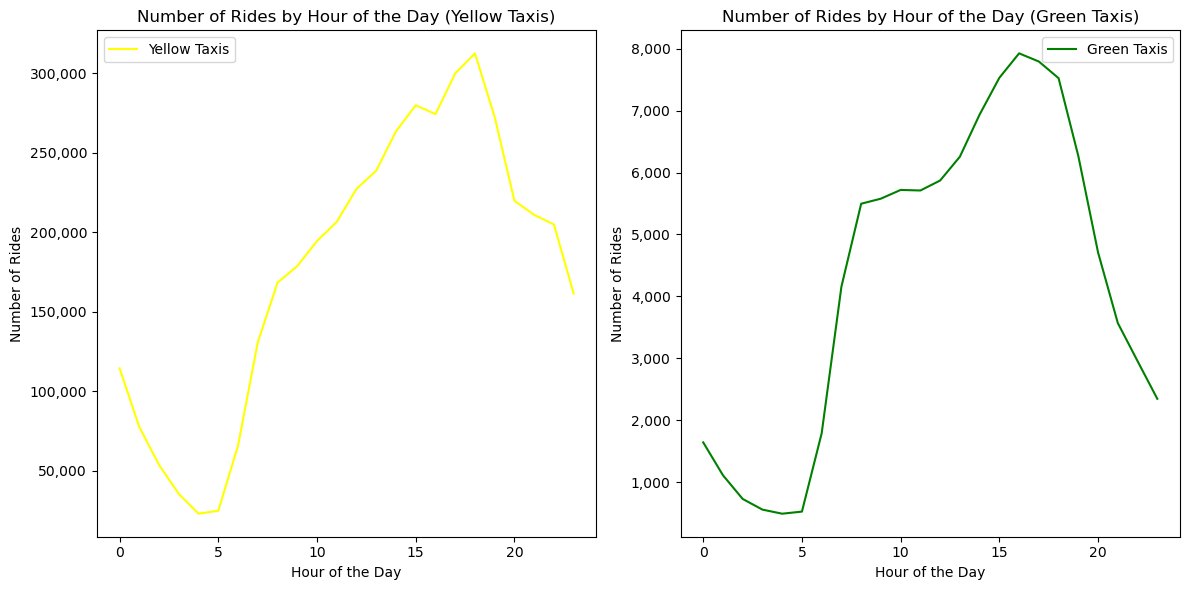

Her kan vi se at mønstret er det samme, vi har bare mange flere rides for gul taxi


In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load data from your DataFrames (e.g., df_yellow and df_green) and the relevant columns (pick up time, trip distance, fare)
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])

# Analyze the number of rides by hour of the day for yellow taxis
df_yellow['hour_of_day'] = df_yellow['tpep_pickup_datetime'].dt.hour
rides_by_hour_yellow = df_yellow['hour_of_day'].value_counts().sort_index()

# Analyze the number of rides by hour of the day for green taxis
df_green['hour_of_day'] = df_green['lpep_pickup_datetime'].dt.hour
rides_by_hour_green = df_green['hour_of_day'].value_counts().sort_index()

# Create two subplots for yellow and green taxis
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for yellow taxis
axes[0].plot(rides_by_hour_yellow.index, rides_by_hour_yellow.values, color='yellow', label='Yellow Taxis')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Number of Rides')
axes[0].set_title('Number of Rides by Hour of the Day (Yellow Taxis)')
axes[0].legend()

# Plot for green taxis
axes[1].plot(rides_by_hour_green.index, rides_by_hour_green.values, color='green', label='Green Taxis')
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Number of Rides')
axes[1].set_title('Number of Rides by Hour of the Day (Green Taxis)')
axes[1].legend()

# Format y-axis ticks with commas
for ax in axes:
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

print('Her kan vi se at mønstret er det samme, vi har bare mange flere rides for gul taxi')

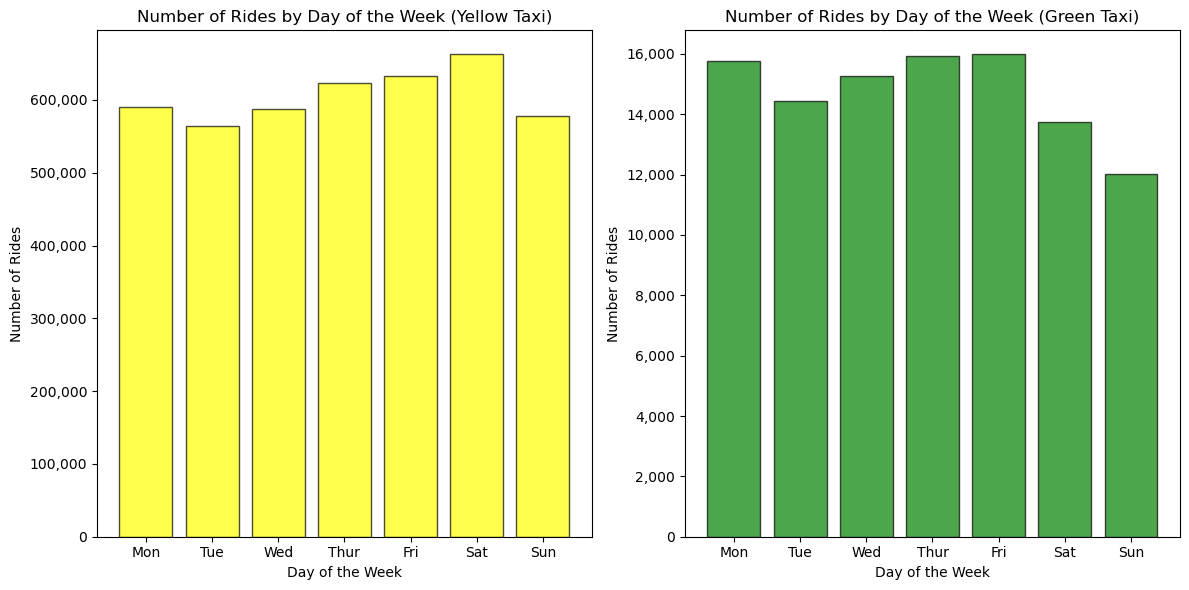

In [75]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Analyze and plot histogram for df_yellow
df_yellow['day_of_week'] = df_yellow['tpep_pickup_datetime'].dt.dayofweek
rides_by_day_yellow = df_yellow['day_of_week'].value_counts().sort_index()

axes[0].bar(rides_by_day_yellow.index, rides_by_day_yellow.values, color='yellow', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Number of Rides')
axes[0].set_title('Number of Rides by Day of the Week (Yellow Taxi)')
axes[0].set_xticks(range(7))
axes[0].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
axes[0].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Analyze and plot histogram for df_green
df_green['day_of_week'] = df_green['lpep_pickup_datetime'].dt.dayofweek
rides_by_day_green = df_green['day_of_week'].value_counts().sort_index()

axes[1].bar(rides_by_day_green.index, rides_by_day_green.values, color='green', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Number of Rides')
axes[1].set_title('Number of Rides by Day of the Week (Green Taxi)')
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
axes[1].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [76]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

NumberOfRidesDayWeek_yellow = df_yellow['day_of_week'].value_counts().sort_index().rename(dict(enumerate(weekdays))).apply(lambda x: "{:,}".format(x))
NumberOfRidesDayWeek_green = df_green['day_of_week'].value_counts().sort_index().rename(dict(enumerate(weekdays))).apply(lambda x: "{:,}".format(x))

print("Number of rides by day of the week (Yellow Taxi):")
print(NumberOfRidesDayWeek_yellow)
print("\nNumber of rides by day of the week (Green Taxi):")
print(NumberOfRidesDayWeek_green)

Number of rides by day of the week (Yellow Taxi):
Monday       590,914
Tuesday      564,248
Wednesday    587,319
Thursday     623,422
Friday       633,137
Saturday     662,430
Sunday       577,516
Name: day_of_week, dtype: object

Number of rides by day of the week (Green Taxi):
Monday       15,763
Tuesday      14,449
Wednesday    15,283
Thursday     15,948
Friday       15,983
Saturday     13,748
Sunday       12,008
Name: day_of_week, dtype: object


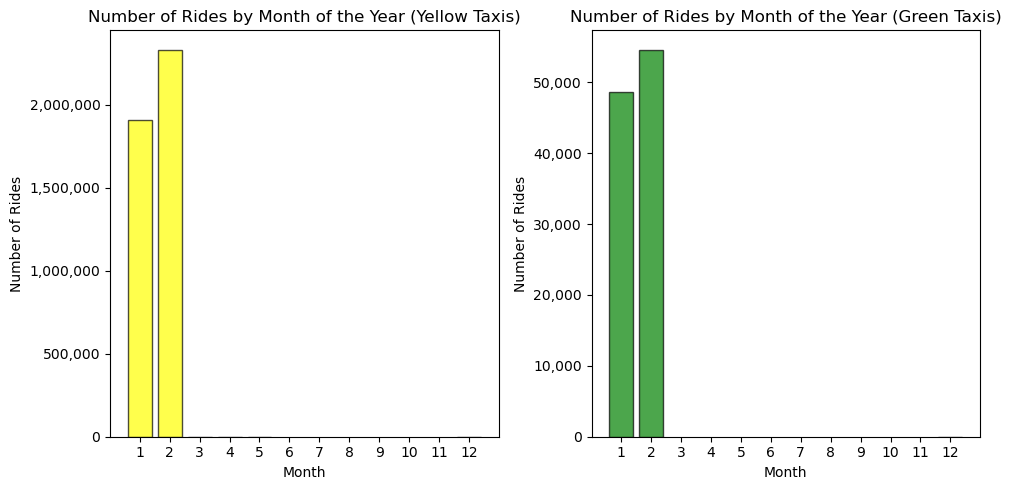

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load data from your DataFrames (e.g., df_yellow and df_green) and the relevant columns (pick up time, trip distance, fare)
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])

# Analyze the number of rides by month of the year for yellow taxis
df_yellow['month'] = df_yellow['tpep_pickup_datetime'].dt.month
rides_by_month_yellow = df_yellow['month'].value_counts().sort_index()

# Analyze the number of rides by month of the year for green taxis
df_green['month'] = df_green['lpep_pickup_datetime'].dt.month
rides_by_month_green = df_green['month'].value_counts().sort_index()

# Create two separate plots side by side for yellow and green taxis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot for yellow taxis
ax1.bar(rides_by_month_yellow.index, rides_by_month_yellow.values, color='yellow', alpha=0.7, edgecolor='black')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Rides')
ax1.set_title('Number of Rides by Month of the Year (Yellow Taxis)')
ax1.set_xticks(range(1, 13))
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Plot for green taxis
ax2.bar(rides_by_month_green.index, rides_by_month_green.values, color='green', alpha=0.7,edgecolor='black')
ax2.set_xlabel('Month')
ax2.set_ylabel('Number of Rides')
ax2.set_title('Number of Rides by Month of the Year (Green Taxis)')
ax2.set_xticks(range(1, 13))
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

In [78]:
print('FLERE MÅNEDER HER VILLE HAVE VÆRET BEDRE, især når vi også laver forecast, så har vi en lille ide allerede omkring sæsonindeks')
print('Burde vi rename index så der står månederne istedet for tal???')

FLERE MÅNEDER HER VILLE HAVE VÆRET BEDRE, især når vi også laver forecast, så har vi en lille ide allerede omkring sæsonindeks
Burde vi rename index så der står månederne istedet for tal???


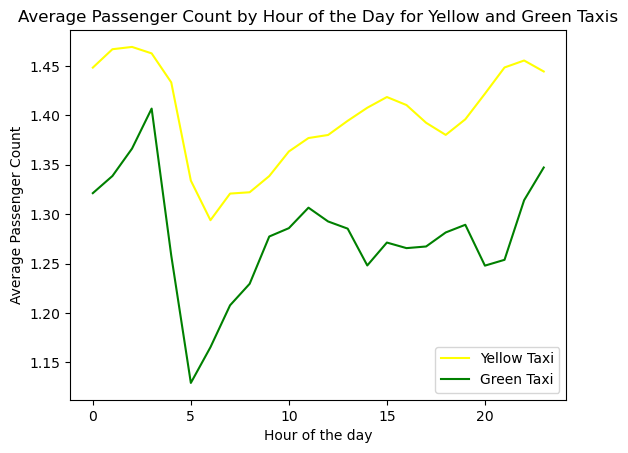

In [79]:
#Average passenger count by hour of the day
# Calculating trip duration for yellow taxis
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])
df_yellow['tpep_dropoff_datetime'] = pd.to_datetime(df_yellow['tpep_dropoff_datetime'])
df_yellow['trip_duration'] = df_yellow['tpep_dropoff_datetime'] - df_yellow['tpep_pickup_datetime']
df_yellow['trip_duration_minutes'] = df_yellow['trip_duration'].dt.total_seconds() / 60
grouped_data_yellow = df_yellow.groupby(df_yellow['tpep_pickup_datetime'].dt.hour)['passenger_count'].mean()

# Calculating trip duration for green taxis
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])
df_green['lpep_dropoff_datetime'] = pd.to_datetime(df_green['lpep_dropoff_datetime'])
df_green['trip_duration'] = df_green['lpep_dropoff_datetime'] - df_green['lpep_pickup_datetime']
df_green['trip_duration_minutes'] = df_green['trip_duration'].dt.total_seconds() / 60
grouped_data_green = df_green.groupby(df_green['lpep_pickup_datetime'].dt.hour)['passenger_count'].mean()

#Plotting the average passenger counts for both yellow and green taxis on the same graph
plt.plot(grouped_data_yellow.index, grouped_data_yellow.values, color='yellow', label='Yellow Taxi')
plt.plot(grouped_data_green.index, grouped_data_green.values, color='green', label='Green Taxi')
plt.xlabel('Hour of the day')
plt.ylabel('Average Passenger Count')
plt.title('Average Passenger Count by Hour of the Day for Yellow and Green Taxis')
plt.legend()
plt.show()

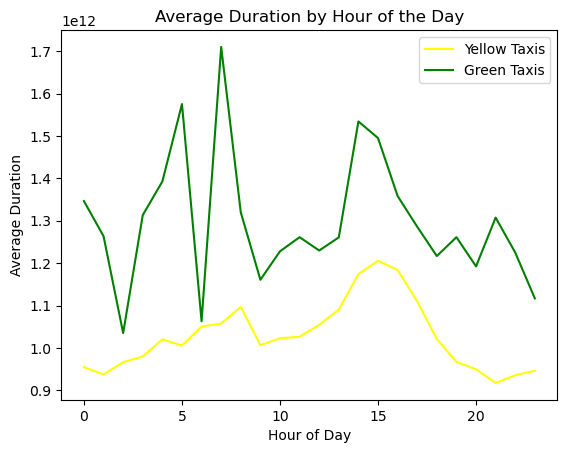

In [80]:
# Analyze the average duration by hour of the day for yellow taxis
avg_duration_by_hour_yellow = df_yellow.groupby(df_yellow['tpep_pickup_datetime'].dt.hour)['trip_duration'].mean()

# Analyze the average duration by hour of the day for green taxis
avg_duration_by_hour_green = df_green.groupby(df_green['lpep_pickup_datetime'].dt.hour)['trip_duration'].mean()

# Create a line plot to visualize the average duration by hour of the day for both yellow and green taxis
plt.plot(avg_duration_by_hour_yellow.index, avg_duration_by_hour_yellow.values, color='yellow', label='Yellow Taxis')
plt.plot(avg_duration_by_hour_green.index, avg_duration_by_hour_green.values, color='green', label='Green Taxis')

plt.xlabel('Hour of Day')
plt.ylabel('Average Duration')
plt.title('Average Duration by Hour of the Day')
plt.legend()

plt.show()

In [81]:
print('giver ovenstående graf værdi?????')

giver ovenstående graf værdi?????


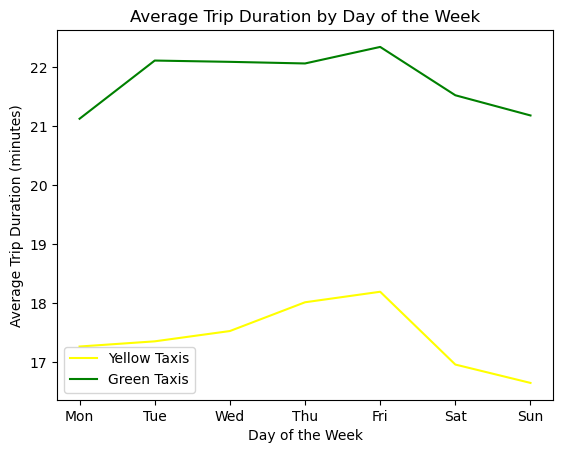

giv avg trip duration definitionen et andet navn og check at de forskellige plots definitioner i opgaven ikke ligner hinanden
de skal navngives så vi ikke bliver forvirret og fucker op i koderne fordi de hedder det samme


In [82]:
# Calculate the average trip duration by day of the week for yellow taxis
avg_trip_duration_yellow = df_yellow.groupby(df_yellow['tpep_pickup_datetime'].dt.dayofweek)['trip_duration_minutes'].mean()

# Calculate the average trip duration by day of the week for green taxis
avg_trip_duration_green = df_green.groupby(df_green['lpep_pickup_datetime'].dt.dayofweek)['trip_duration_minutes'].mean()

# Create a line plot to visualize the average trip duration by day of the week for both yellow and green taxis
days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.plot(days_of_week, avg_trip_duration_yellow, color='yellow', label='Yellow Taxis')
plt.plot(days_of_week, avg_trip_duration_green, color='green', label='Green Taxis')

plt.xlabel('Day of the Week')
plt.ylabel('Average Trip Duration (minutes)')
plt.title('Average Trip Duration by Day of the Week')
plt.legend()
plt.show()


print('giv avg trip duration definitionen et andet navn og check at de forskellige plots definitioner i opgaven ikke ligner hinanden')
print('de skal navngives så vi ikke bliver forvirret og fucker op i koderne fordi de hedder det samme')

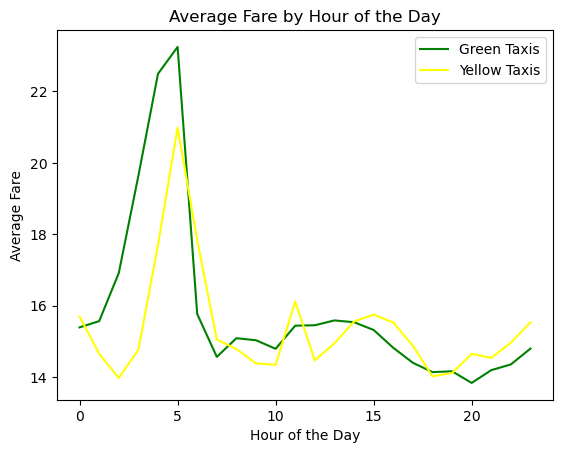

In [94]:
#Analyzing the Relationship between Temporal Patterns and Fare for Green Taxis
avg_fare_by_hour_green = df_green.groupby('hour_of_day')['fare_amount'].mean()

#Analyzing the Relationship between Temporal Patterns and Fare for Yellow Taxis
avg_fare_by_hour_yellow = df_yellow.groupby('hour_of_day')['fare_amount'].mean()

#Creating a line plot to show the average fare by hour of the day for both green and yellow taxis
plt.plot(avg_fare_by_hour_green.index, avg_fare_by_hour_green.values, color='green', label='Green Taxis')
plt.plot(avg_fare_by_hour_yellow.index, avg_fare_by_hour_yellow.values, color='yellow', label='Yellow Taxis')

plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare')
plt.title('Average Fare by Hour of the Day')
plt.legend()

plt.show()



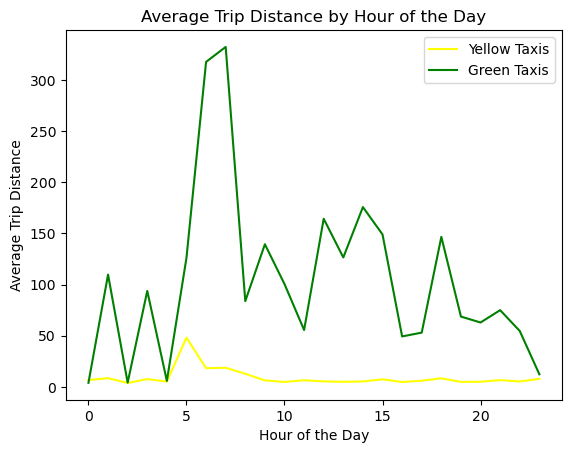

In [95]:
# Analyze the relationship between time of day and trip distance for yellow taxis
df_yellow['hour_of_day'] = df_yellow['tpep_pickup_datetime'].dt.hour
avg_trip_distance_by_hour_yellow = df_yellow.groupby('hour_of_day')['trip_distance'].mean()

# Analyze the relationship between time of day and trip distance for green taxis
df_green['hour_of_day'] = df_green['lpep_pickup_datetime'].dt.hour
avg_trip_distance_by_hour_green = df_green.groupby('hour_of_day')['trip_distance'].mean()

# Plot the average trip distance by hour of the day for yellow taxis
plt.plot(avg_trip_distance_by_hour_yellow.index, avg_trip_distance_by_hour_yellow.values, color='yellow', label='Yellow Taxis')

# Plot the average trip distance by hour of the day for green taxis
plt.plot(avg_trip_distance_by_hour_green.index, avg_trip_distance_by_hour_green.values, color='green', label='Green Taxis')

plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip Distance')
plt.title('Average Trip Distance by Hour of the Day')
plt.legend()
plt.show()


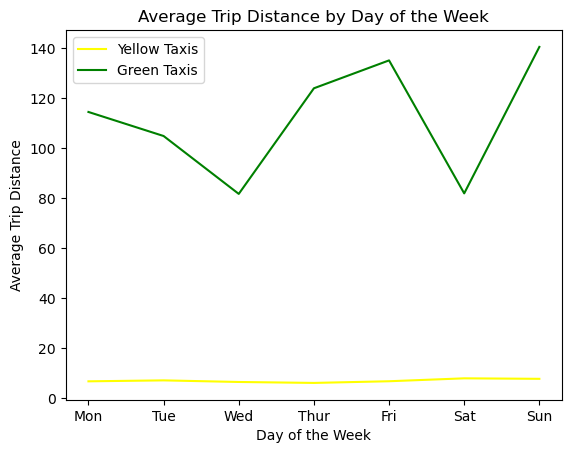

In [85]:
# Analyze the average trip distance by day of the week for yellow taxis
avg_trip_distance_by_day_yellow = df_yellow.groupby(df_yellow['tpep_pickup_datetime'].dt.dayofweek)['trip_distance'].mean()

# Analyze the average trip distance by day of the week for green taxis
avg_trip_distance_by_day_green = df_green.groupby(df_green['lpep_pickup_datetime'].dt.dayofweek)['trip_distance'].mean()

# Define the labels for the days of the week
days_of_week = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

# Plot the average trip distance by day of the week for yellow taxis
plt.plot(days_of_week, avg_trip_distance_by_day_yellow.values, color='yellow', label='Yellow Taxis')

# Plot the average trip distance by day of the week for green taxis
plt.plot(days_of_week, avg_trip_distance_by_day_green.values, color='green', label='Green Taxis')

plt.xlabel('Day of the Week')
plt.ylabel('Average Trip Distance')
plt.title('Average Trip Distance by Day of the Week')
plt.legend()
plt.show()

In [86]:
print('giver ovenstående graf mening??? hvad giver den os i vores analyse?????')

giver ovenstående graf mening??? hvad giver den os i vores analyse?????


In [87]:
print('skal vi lave et histogram for average trip distance by month?????')

skal vi lave et histogram for average trip distance by month?????


In [88]:
print('Also, analyze the relationship between temporal patterns and other variables, such as trip distance and fare.')
print('SVARER VI PÅ DET HER SPØRGSMÅL ELLER BEHØVER VI MERE????')
print('OPGAVETEKSTEN HAR ET LINK MED EKSEMPLER VI KAN BRUGE; DET MÅ VI TJEKKE UD OG SE OM VI HAR ALT')

Also, analyze the relationship between temporal patterns and other variables, such as trip distance and fare.
SVARER VI PÅ DET HER SPØRGSMÅL ELLER BEHØVER VI MERE????
OPGAVETEKSTEN HAR ET LINK MED EKSEMPLER VI KAN BRUGE; DET MÅ VI TJEKKE UD OG SE OM VI HAR ALT


### Task 5: Time-Series Forecasting
Use Prophet or a similar tool to forecast the number of taxi rides in the future, respectively for green and yellow taxis. This includes creating a time-series model, tuning its parameters, and validating its performance. Also, interpret the model's predictions and identify the factors driving the forecasted trends.

A good example for using Prophet to do time-series forecasting can be found here https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

**Hint**: In order to evaluate how your model performs, you need to split the dataset to be train and test. For time-series data, we cannot randomly select the data record (i.e. the rows) to be in train or test. Namely, all training data must be before the earliest test data. In other words, the model is always trained on historical data and then used to forecast the future.

In [89]:
print('skal vi måske loade dataset igen her med flere måneder??')
print('HVORDAN FIKSER VI FORECAST, OVENSTÅENDE FORSØGTE JEG I 4SAMLET OG DET VIRKEDE IKKE')

skal vi måske loade dataset igen her med flere måneder??
HVORDAN FIKSER VI FORECAST, OVENSTÅENDE FORSØGTE JEG I 4SAMLET OG DET VIRKEDE IKKE


In [90]:
#start_date = pd.to_datetime('2022-01-01 00:00:08')
#end_date = pd.to_datetime('2022-12-31')
#df_yellow = df_yellow[(df_yellow['tpep_pickup_datetime'] >= start_date) & (df_yellow['tpep_pickup_datetime'] <= end_date)]


In [91]:
#from prophet import Prophet
#import pandas as pd
#from prophet.plot import plot_plotly
#import plotly.offline as py
#py.init_notebook_mode()


#df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])
#df_yellow['number_of_rides'] = 1

# Opret en gruppebaseret dataframe ved at akkumulere antallet af ture pr. uge
#df_ForecastedYellow = df_yellow.groupby(pd.Grouper(key='tpep_pickup_datetime', freq='W'))['number_of_rides'].sum().reset_index()
#df_ForecastYellow = df_yellow[['tpep_pickup_datetime', 'number_of_rides']].sample(100)
#pd.Grouper: pakke fra panda som giver mig en særlig gruppering. 
#freq at det skal være i uger
#sum summerer number of rides på hver uge
#reset.index, så df ikke får nyt index iforhold til de her datetimes. 

#df_ForecastedYellow = df_ForecastedYellow.rename(columns={'tpep_pickup_datetime': 'ds', 'number_of_rides': 'y'})

In [92]:
#df_ForecastedYellow

In [93]:
#import matplotlib.pyplot as plt

#model = Prophet(seasonality_mode='multiplicative', interval_width=0.95, changepoint_prior_scale=0.05, changepoint_range=0.9)
#model.add_seasonality(name='monthly', period=30, fourier_order=8)  # Example of adding weekly seasonality

#model.fit(df_ForecastedYellow)

#future = model.make_future_dataframe(periods=10, freq='W',  include_history=False)    
# Definer antallet af fremtidige tidspunkter, du vil forudsige 


#forecast = model.predict(future)

#model.plot(forecast,uncertainty=True)

#model.plot_components(forecast)

#plt.show()


### Task 6: Report and Presentation
- Make this project as part of your presentation, **using beamer in LaTeX**. 
- This includes summarizing your methodology, presenting your results, and discussing your conclusions. Also, identify the limitations of your analysis and suggest areas for future research.